<a href="https://colab.research.google.com/github/MIrfaanA/load-shortfall-regression-predict-api/blob/master/Group_13_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spain Electricity ShortFall Challenge Case Study**
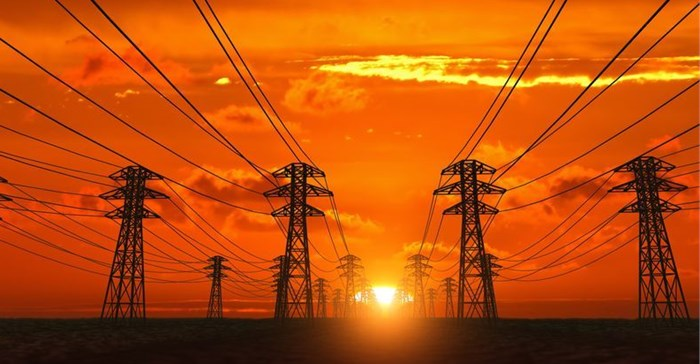
### **Project Overview and Description**

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation.

As the lead data science  company **(Team 13)** that was awarded a contract by the government of Spain we were able to assist them understand the trends and patterns by building various models of the shortfall between the energy generated by means of fossil fuels and various renewable sources. The various aspects that we were able to deal with as a company are as follows:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand Loshortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


**This report was prepared by Company Team_13 (JHB) on 12 Nov 2021**


<a id="cont"></a>

# **Table of Contents**

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>
<br> 2.1 Data Merging

<a href=#three>3. Data Processing and Engineering  </a>
<br> 3.1 Data Types
<br> 3.2 Data Transformation
         <br> 3.2.1  Converting Column data type
         <br> 3.2.2  Filling Null Values  

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>
<br> 5.1 Linear Regression 
<br> 5.2 Lasso Regression
<br> 5.3 Ridge Regresssion
<br> 5.4 Decision Tree Regression
<br> 5.5 Random Forest Regression
<br> 5.6 XGBoost Regression

<a href=#six>6. Model Performance    </a>  
<br><a href=#seven>7.Model Submission   </a>
<br>
<br><a href=#eight>8.Conclusion</a>

 <a id="one"></a>
# **1. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

#Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression 


#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Display
from ipywidgets import interact, IntSlider
from IPython.display import display


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

<a id="two"></a>
# **2. Loading the Data**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [72]:

df_train =pd.read_csv('https://raw.githubusercontent.com/MIrfaanA/load-shortfall-regression-predict-api/master/Project/Advanced-Regression-Starter-Data/df_train.csv',index_col=0)
df_test=pd.read_csv('https://raw.githubusercontent.com/MIrfaanA/load-shortfall-regression-predict-api/master/Project/Advanced-Regression-Starter-Data/df_test.csv') 

In [73]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### 2.1 Merge Data


In [74]:
df=pd.concat([df_train, df_test])

<a id="three"></a>
# **3. Data Processing and Engineering**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The dataset will be cleaned and new features created. Note that we will call this DataFrame 'clean_df'

In [75]:
df_clean=df

### 3.1 Data Types

In order to analyse Data for regression we have to see what data types there are in the columns. Ideally we would want integers and/or floats.

In [76]:
df_clean.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

There are three columns (time, Seville_pressure, Valencia_wind_deg) that are of theobjects type. Lets view these columns:

In [77]:
object_df= df_clean[['Valencia_wind_deg','Seville_pressure','time']]

In [78]:
object_df.head()

,Valencia_wind_deg,Seville_pressure,time
0,level_5,sp25,2015-01-01 03:00:00
1,level_10,sp25,2015-01-01 06:00:00
2,level_9,sp25,2015-01-01 09:00:00
3,level_8,sp25,2015-01-01 12:00:00
4,level_7,sp25,2015-01-01 15:00:00


### 3.2 Transforming data to float or integer

In these section we will transform the data types mentioned above, fill null values and also convert the time data to a usable format.



### 3.2.1 Converting Column Data Types



*   *Time Column*



In [79]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

We will also seperate that time column values in to hours, days and months using the following code below:

In [80]:
df_clean['new_time']=[d.time() for d in df_clean['time']]

In [81]:

df_clean['new_date']=[d.date() for d in df_clean['time']]

In [82]:
df_clean['month'] = df_clean.time.dt.month

In [83]:
df_clean['day']=df_clean.time.dt.day

In [84]:

df_clean['hour']=df_clean.time.dt.time
df_clean=df_clean.drop(columns=['new_time','new_date'])
df_clean['hours'] = df_clean['hour'].astype(str)
df_clean['hours'] = df_clean['hours'].str[:2]
df_clean['hours']=df_clean['hours'].astype(int)
df_clean=df_clean.drop(columns=['hour'])



*   *Valencia wind degree*




Looking at the Valencia_wind_deg column. They are represented in levels. These levels can be converted to integers by including the number only.

In [85]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

We can now convert the columns to a numeric column

In [86]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [87]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Unnamed: 0,month,day,hours
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,NaN,1,1,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,NaN,1,1,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,NaN,1,1,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,NaN,1,1,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,NaN,1,1,15




*   Seville Pressure




We can also convert the Seville pressure to a numeric type by first extracting the numbers and then converting it to a numeric type


In [88]:
df_clean['Seville_pressure'] = df_clean.Seville_pressure.str.extract('(\d+)')

In [89]:
df_clean.Seville_pressure = pd.to_numeric(df_clean.Seville_pressure)

In [90]:
df_clean['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: int64

We now expect all columns to be of an integer or float type. Lets confirm this below:

In [91]:
df_clean.dtypes

time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                 int64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id              float64
Barcelona_weather_id     


### 3.2.2 Filling Null Values




Lets have a look at the data to determine if there are any null values

In [92]:
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

The Valencia Pressure column is the only one with the null values. Obtaining the summary statistics related to that column will allow us to fill the rows with relevant values

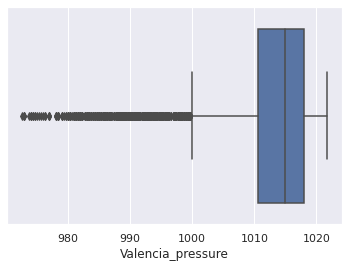

In [93]:
sns.boxplot(df['Valencia_pressure'])
plt.show()

Looking at the box blot we see that most of the values lie between 1000 and approximately 1030. Looking at thebox plot and the summary statistics column above we can replace the null values with either the mean, mode or median. It is decided that the null values will be replaced with the median

In [94]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

Confirm if there are any null values in the train and test data set:

In [95]:
df_clean.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Note that the load_shortfall_3h column has null values. This is because those rows form part of the test data. All columns are now of the same data types and the relevant null values filled in. These steps performed are basic cleaning steps. Further manipulation of the data can now be performed if needed

Drop the unamed columns and time column


In [96]:
df_clean = df_clean.drop(['Unnamed: 0','time'],axis = 1)

<a id="four"></a>
# **4. Exploratory Data Analysis (EDA)**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Lets have a look at some basic data statistics related to the cleaned data

In [28]:
df_clean.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,month,day,hours
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000,11683.000000,11683.000000,11683.000000
mean,2.433750,5.476590,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,12.780193,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1013.567063,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612,6.525122,15.735256,10.498844
std,1.831762,2.863384,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,7.270223,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.146984,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404,3.447945,8.798064,6.873990
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1012.333333,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333,4.000000,8.000000,4.500000
50%,2.000000,5.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1016.666667,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667,7.000000,16.0

Take note that the temperature values across all regions in Spain are very simillar to eachother. There is a possibility that the temperatures are highly correlated . We will determine this by generating a correlation heat map or using a correlation stage column.




*   **Load Shortfall Distribution**




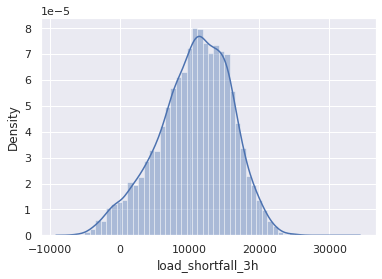

In [97]:
sns.distplot(df_clean['load_shortfall_3h'])
plt.show()

The load short fall has a normal distribution

### Checking For Multi Collinearity

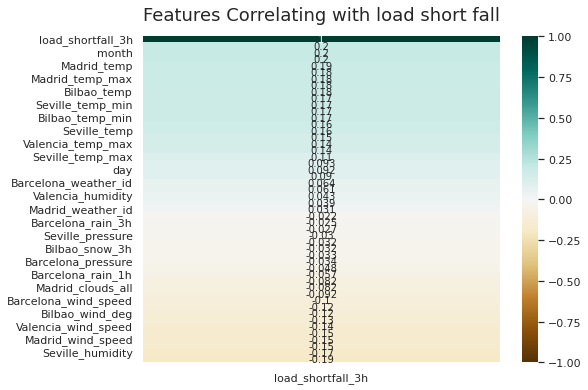

In [98]:
#heatmap of correlation to stage column
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_clean.corr()[['load_shortfall_3h']].
                      sort_values(by='load_shortfall_3h', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with load short fall',
                  fontdict={'fontsize':18}, pad=16);

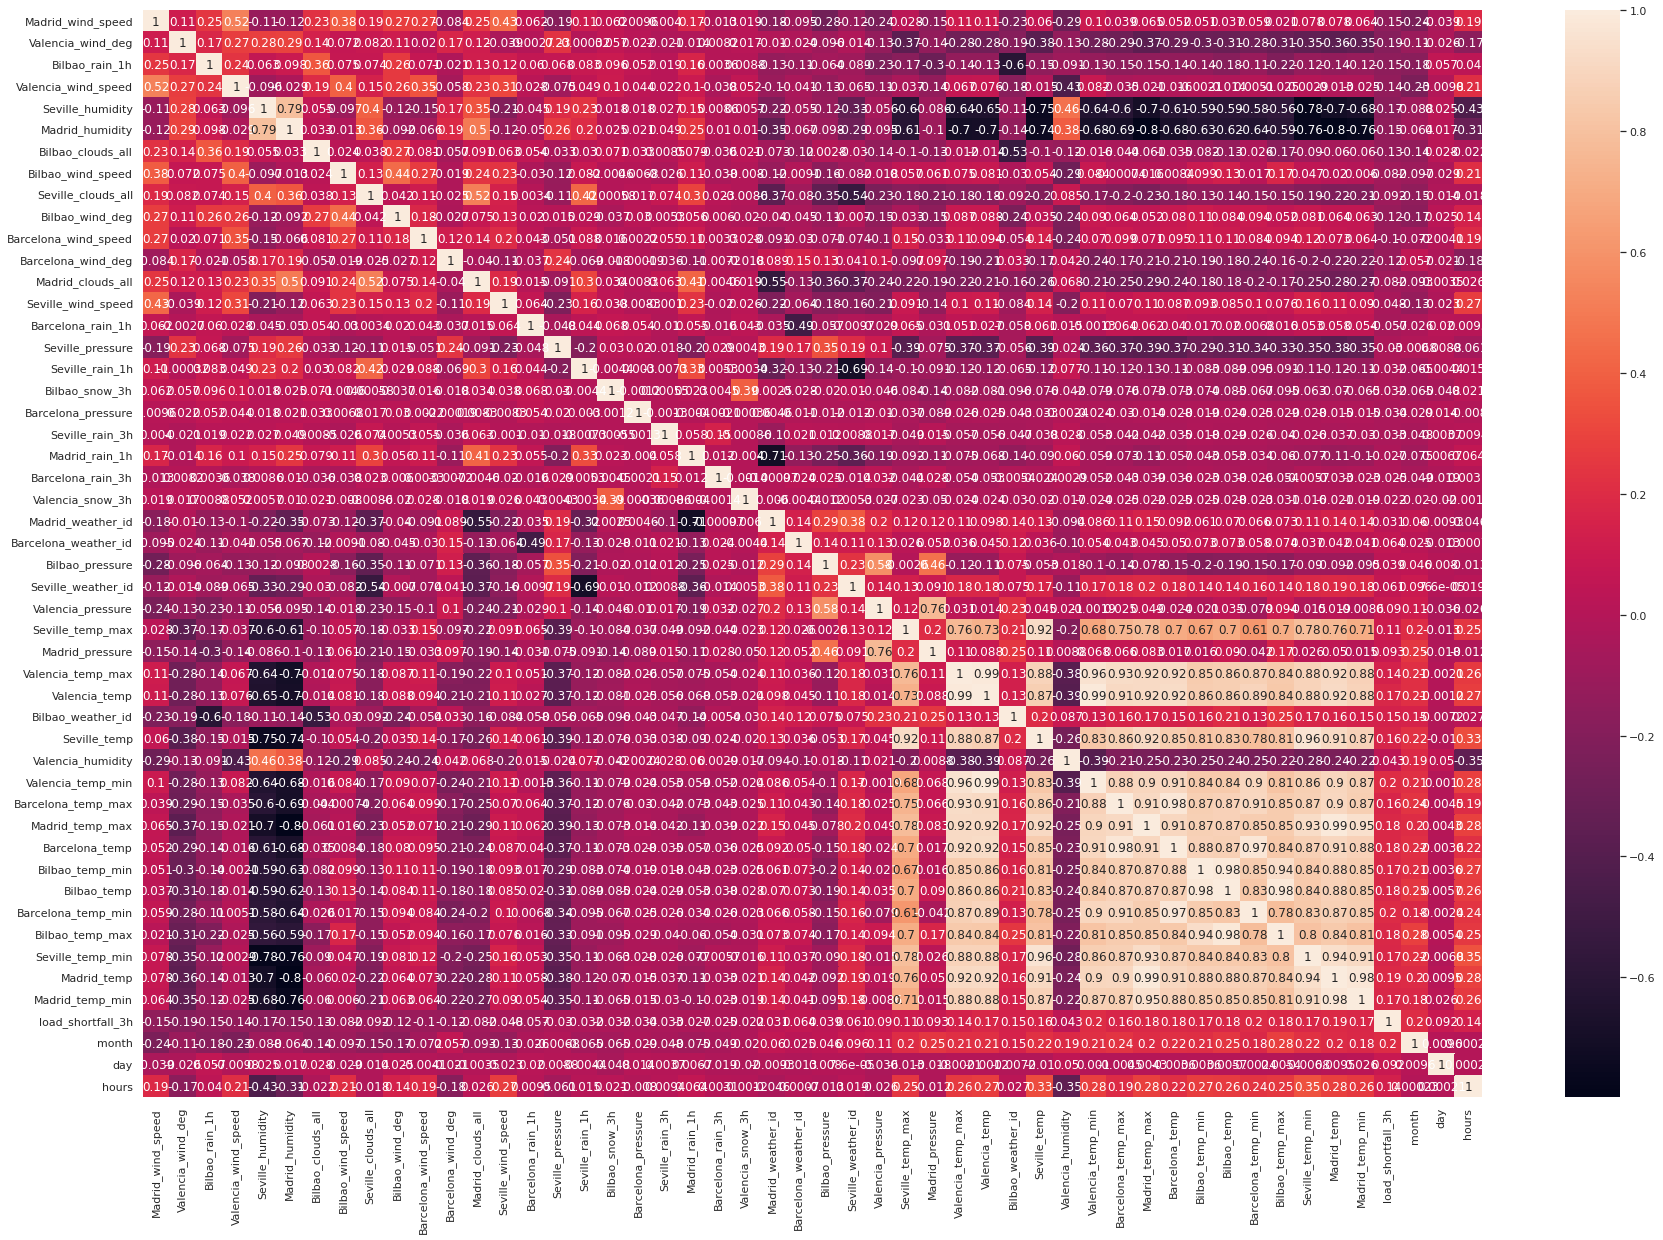

In [46]:
corr=df_clean.corr()
sns.heatmap(corr,annot=True)

# change image size <- resets figure size for a seaborn plot


plt.show()


Right of the bat we see that there is Multicollinearity with regards to the temperature values. We can therefore drop these values. We will keep Valencia_temp_min however, as it is the predictor variable that has the highest correlation to the load shortfall compared to the other temperature values.

In [47]:
df_clean=df_clean.drop(columns=['Madrid_temp_min','Bilbao_temp_min','Bilbao_temp_max','Seville_temp','Seville_temp_max','Barcelona_temp_max','Barcelona_temp_min','Valencia_temp_max','Valencia_temp','Barcelona_temp','Bilbao_temp','Seville_temp_min','Madrid_temp','Madrid_temp_max','Seville_weather_id','Bilbao_weather_id','Barcelona_weather_id','Madrid_weather_id','Bilbao_rain_1h','Seville_clouds_all','Madrid_clouds_all','Bilbao_rain_1h','Barcelona_rain_1h','Seville_rain_1h','Bilbao_snow_3h','Barcelona_rain_3h'])

Now that we have dropped more values. We can look at the correlation map again. This time it will be more clear to see as they are less variables involved

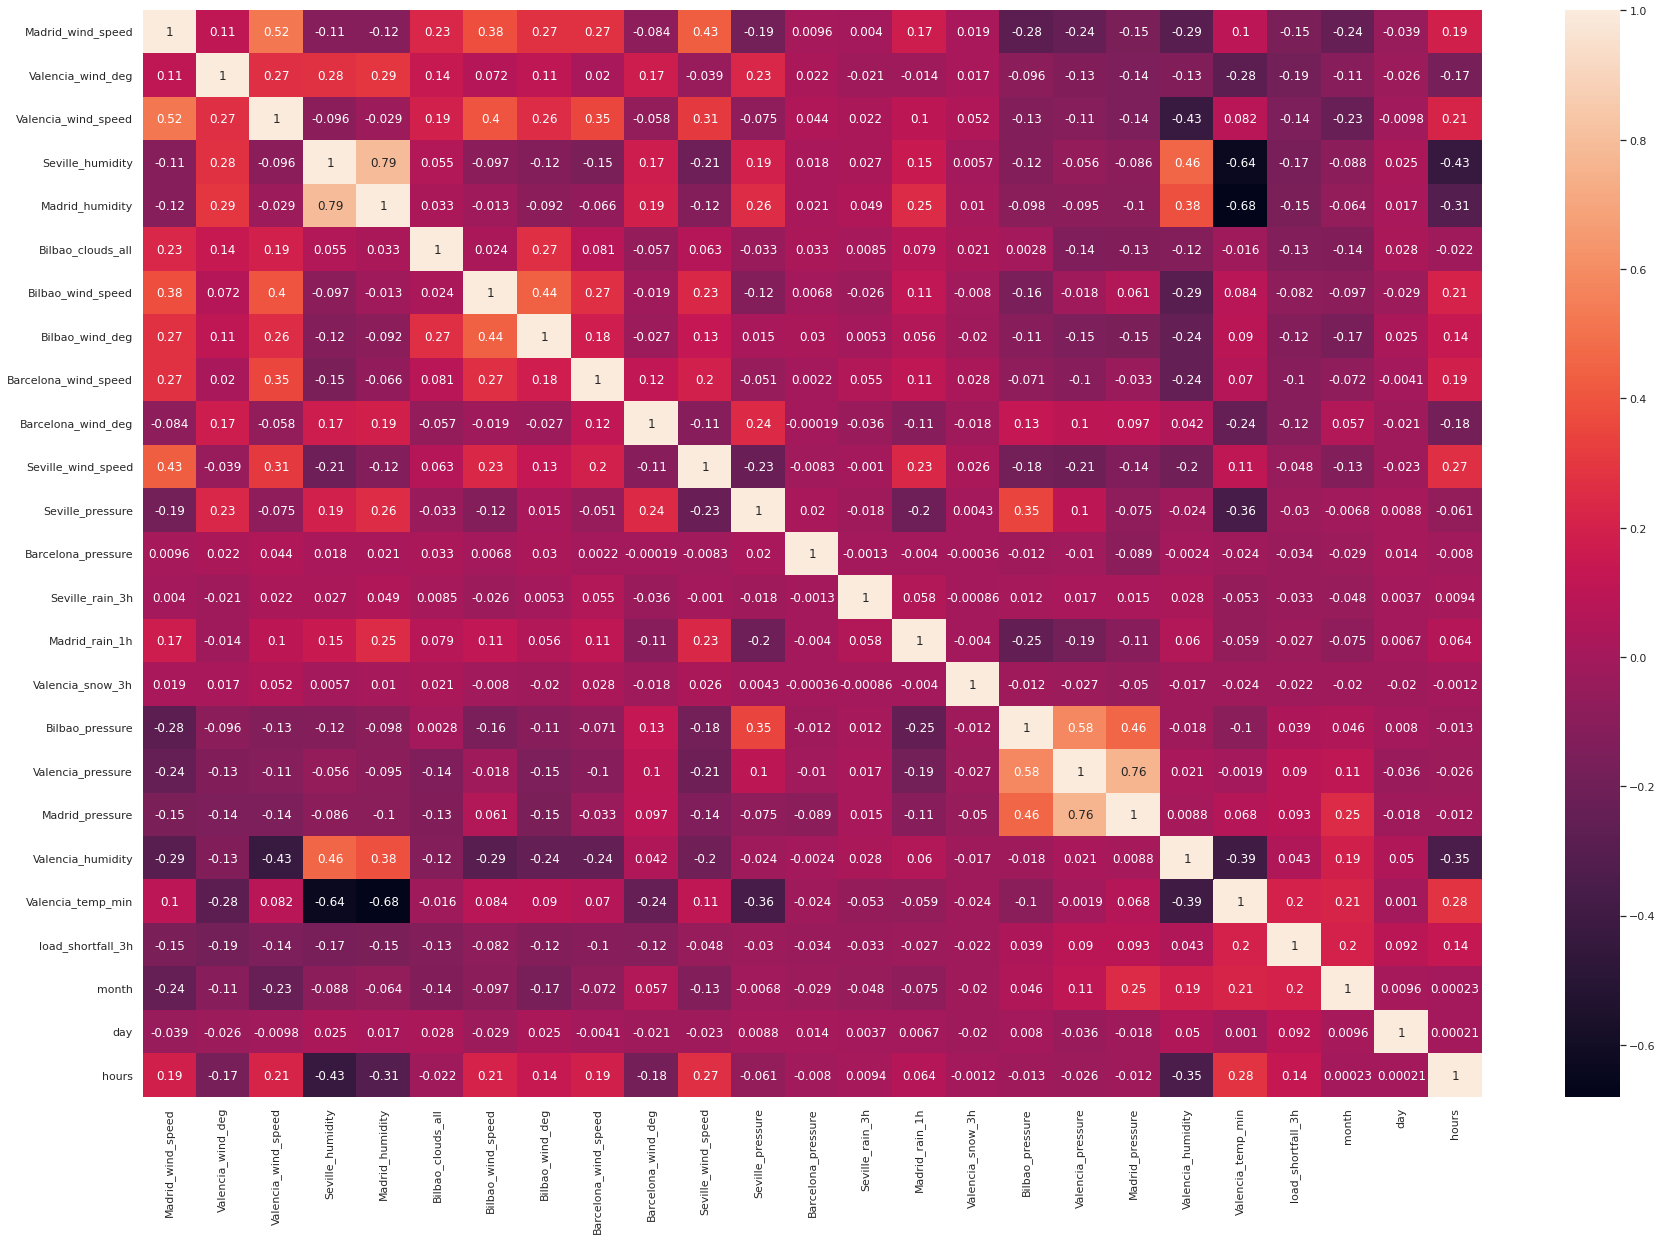

In [48]:
corr=df_clean.corr()
sns.heatmap(corr,annot=True)

# change image size <- resets figure size for a seaborn plot
sns.set(rc={'figure.figsize':(3,2)})
plt.show()

Looking further into the correlation heat map we also notice that we also notice that the Seville, Valencia and Madrid Humidity have high correlation to each other. We will drop the Valencia and Madrid humidity and keep the Seville humidity value as it has a higher correlation to the load shortfall.

In [49]:
df_clean=df_clean.drop(columns=['Valencia_humidity','Madrid_humidity'])



* **Load Shortfall per Month**

The graph below will depict the load shortfall by month



In [50]:
shortfall_by_month=df_clean.groupby(['month'])['load_shortfall_3h'].agg('sum')

In [51]:
shortfall_by_month=shortfall_by_month.reset_index()

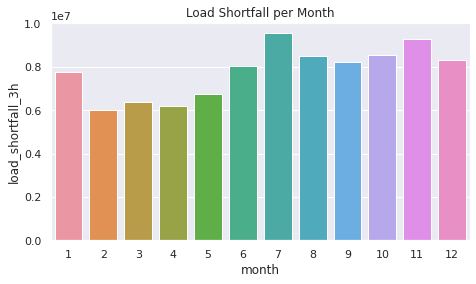

In [52]:
sns.set(rc = {'figure.figsize':(7.5,4)})
sns.barplot(shortfall_by_month['month'], shortfall_by_month['load_shortfall_3h'], hue=None).set(title='Load Shortfall per Month')
plt.show()




Spain has a Mediterranean climate. With hot dry summers and cool wet winters. From the graph it is of interest to note that the load shortfall begins increasing, as the summer months(June-August) approach. Winter(December February) has lower shortfalls then Summer and those shortfalls decrease further as the months of Spring (March-May) approach.

The factors that could contribute to the higher load shortfalls in the winter and summer months are likely the increasing in use of heating and cooling devices in those months. Spring has a relatively calmer and comfortable weather, therefore a reduction in devices such as air conditioners.



*   **Load Shortfall based on 3hr intervals**



The graph generated below depicts the load shortfall per 3hr interval

In [53]:
shortfall_hour=df_clean.groupby(['month','day','hours'])['load_shortfall_3h'].agg('sum')

In [54]:
shortfall_hour=shortfall_hour.reset_index()

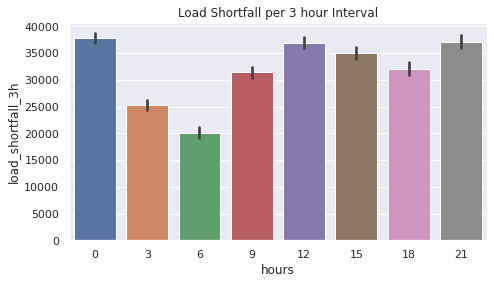

In [55]:
sns.set(rc = {'figure.figsize':(7.5,4)})
sns.barplot(shortfall_hour['hours'], shortfall_hour['load_shortfall_3h'], hue=None).set(title='Load Shortfall per 3 hour Interval')
plt.show()

Note that the highest load shortfall values are from 12pm to 12 am. The day time load shortfall could be due to increased human activity in the day and the night time load shortfall could be due to the decrease in energy generated due to solar power.



*   **Load Shortfall based on temperature**




*    **Scatter Plot based on Temperature and Load Shortfall**


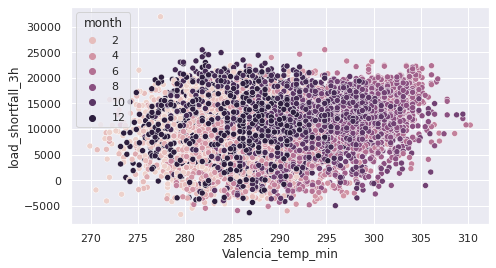

In [56]:
sns.scatterplot(df_clean['Valencia_temp_min'], df_clean['load_shortfall_3h'],df_clean['month'] )
sns.set(rc={'figure.figsize':(3,16)})
plt.show()

The early months in the year have a concentration of points towards the left of the scatter plot. These points correspond to the winter and spring months. Note that spring generally has lower load shortfalls.The mid year values have a higher concentrations towards the top right as they correspond to the winter and summer months in Spain.



*   **Wind Speed and Load Shortfall**




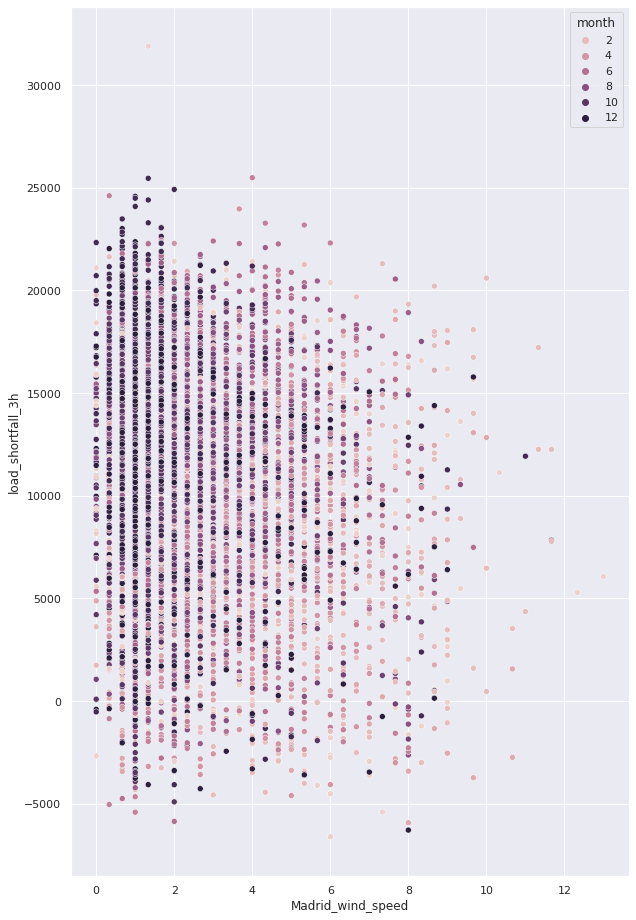

In [58]:
sns.scatterplot(df_clean['Madrid_wind_speed'], df_clean['load_shortfall_3h'], df_clean['month'] ,hue='month')
#sns.set(rc={'figure.figsize':(10,16)})
plt.show()

The scatter plot of the load shortfall and wind speed seems to have a conic shape tapering towards the right. This is suggestive of an increase in windspeed causing a lower load shortfall. This could indicate some feasibility in having wind farms. Also note that this graph confirms that the windy months are around February March by looking at the Hue of the scatter plot 



*   **Wind Speed and Month**




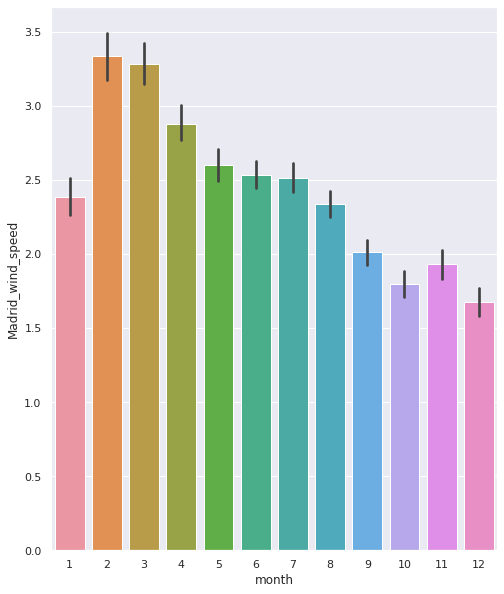

In [ ]:
sns.barplot(df_clean['month'],df_clean['Madrid_wind_speed'], hue=None)
sns.set(rc={'figure.figsize':(8,10)})
plt.show()

Spains windiest month is during Feb/March. The graph above confirms this. This could be a contributing factor to Spain having a lower load shortfall during the spring months.



*   **Wind Degree and Load Shortfall**




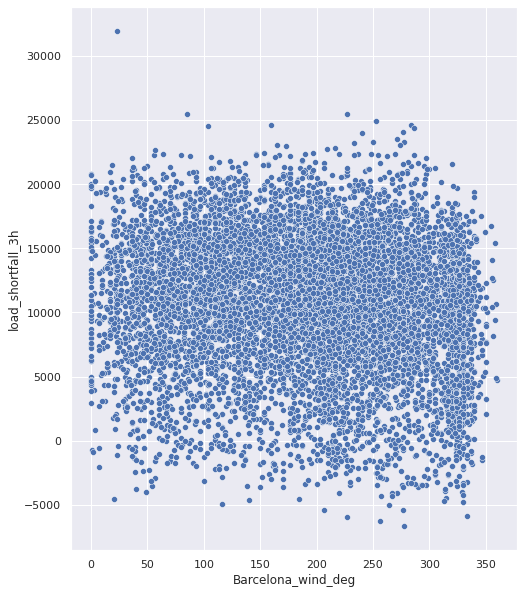

In [ ]:
sns.scatterplot(df_clean['Barcelona_wind_deg'],df_clean['load_shortfall_3h'])
sns.set(rc={'figure.figsize':(8,20)})
plt.show()

Based on the concentration of the points it seems that as we move to higher wind degrees we have a lower load shortfall



*   **Humidity and Load Shortfall**





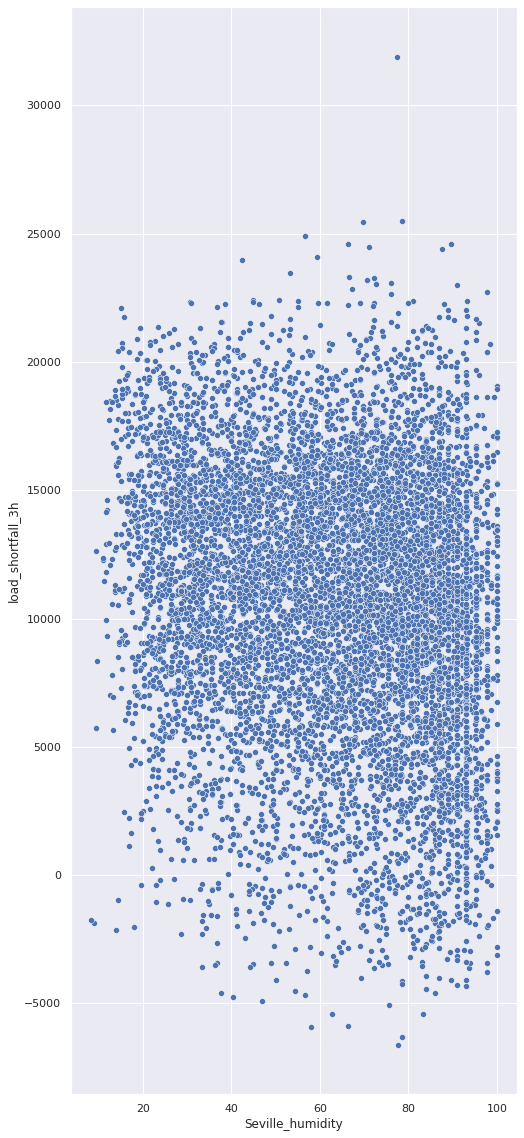

In [ ]:
sns.scatterplot(df_clean['Seville_humidity'], df_clean['load_shortfall_3h'], hue=None)
sns.set(rc={'figure.figsize':(8,10)})
plt.show()



*   **Bilbao Cloud Coverage and Load Shortfall**





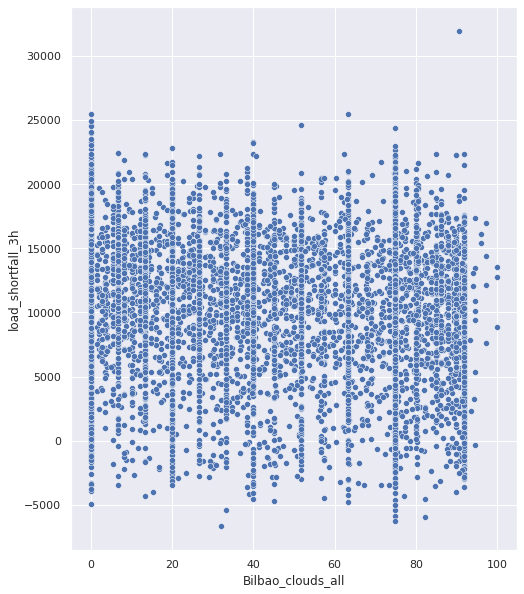

In [ ]:
sns.scatterplot(df_clean['Bilbao_clouds_all'], df_clean['load_shortfall_3h'])
sns.set(rc={'figure.figsize':(18,10)})
plt.show()

There is a downward trend in load shortfall when there is an increase in cloud coverage. Note that although there is a low correlation between cloud coverage and load shortfall it is important to note that overcast days inface have more UV rays reflected back to Earth. This could be a contributing factor to a lower shortfall value

<a id="five"></a>
#**5. Modelling**
<a class="anchor" id="1.1"></a>


In [60]:
# split data
df_rfr=df_clean
y = df_rfr[:len(df_train)][['load_shortfall_3h']]
X = df_rfr[:len(df_train)].drop(['load_shortfall_3h'],axis=1)

In [61]:
# create targets and features dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=10)

### **5.1** Multiple Linear Regression model

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s), But in this case The short fall of Spain electricity in depedent on multilpe variable thus multiple linear regression.

In [62]:
lr = LinearRegression()

lr.fit(X_train,y_train)
preds_Lin = lr.predict(X_test)

### **5.2** Lasso Regression

Lasso regression is a regularization technique, which performs L1-regularization, that is it adds penalty equivalent to **absolute value of the magnitude of coefficients**. This is how it works, Minimization objective = least squares objective + α * (sum of absolute value of coefficients)

In [63]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

### **5.3** Ridge Regression

Lasso regression is a regularization technique, which performs L1-regularization, that is it adds penalty equivalent to **square of the magnitude of coefficients**. This is how it works, Minimization objective = least squares objective + α * (sum of square of coefficients)

In [64]:
rdg = Ridge()
rdg.fit(X_train, y_train)
y_pred_rdg = rdg.predict(X_test)

### **5.4** Decision Tree Model

Decision trees are the Machine Learning models used to make predictions by going through each and every feature in the data set, one-by-one.

In [65]:
regr_tree = DecisionTreeRegressor(random_state=42)
regr_tree.fit(X_train, y_train)
y_pred_regr_tree = regr_tree.predict(X_test)

### **5.5** Random Forest Model

Random forests are a collection of decision trees being grouped together and trained together that use random orders of the features in the given data sets. 
Here how it works, instead of relying on just one decision tree, the random forest takes the prediction from each and every tree and based on the majority of the votes of predictions, and it gives the final output.

In [66]:
rfr = RandomForestRegressor()

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)
preds = CV_rfc.predict(X_test)

### **5.6** Extreme Gradient Boosting (XGBoost) Model

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.
How it works is the ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

In [ ]:
df_xgb=df_clean

reg = XGBRegressor(booster='gbtree',n_estimators = 2000, reg_lambda=1,gamma=0, max_depth = 3)

reg.fit(X_train, y_train)
preds_boost = reg.predict(X_test)

[18:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<a id="six"></a>
# **6. Model Performance**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

For model evaluation, two functions(RMSE and R^2 evaluation metrics were used)

In [ ]:
# evaluate one or more ML models
def rmse(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))


In [ ]:
# Compare model performance
RMSE_df = pd.DataFrame({'Linear Regression': [rmse(y_test, preds_Lin), r2_score(y_test, preds_Lin)],
                        'Lasso Regression': [rmse(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)],
                        'Ridge Regression': [rmse(y_test, y_pred_rdg), r2_score(y_test, y_pred_rdg)], 
                        'Random Forrest Regression': [rmse(y_test, preds), r2_score(y_test, preds)], 
                        'Decision Tree Regression': [rmse(y_test, y_pred_regr_tree), r2_score(y_test, y_pred_regr_tree)], 
                        'XGBoost Regression': [rmse(y_test, preds_boost), r2_score(y_test, preds_boost)]})
RMSE_df

,Linear Regression,Lasso Regression,Ridge Regression,Random Forrest Regression,Decision Tree Regression,XGBoost Regression
0,4963.839165,4965.085729,4964.633006,3249.768845,4899.067773,3269.039153
1,0.126935,0.126497,0.126656,0.625790,0.149571,0.621338


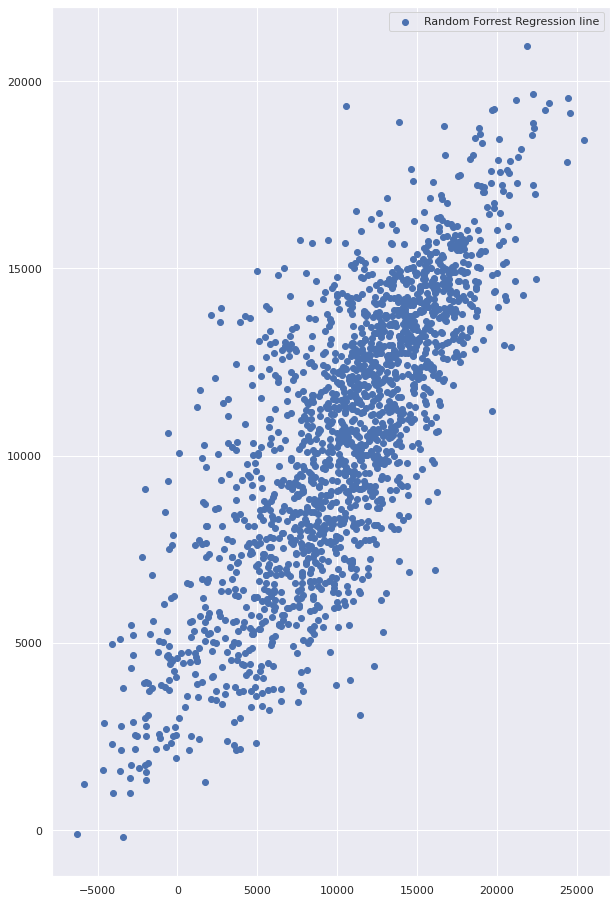

In [68]:
#plt.plot(y_test, preds_Lin, label = "Linear Regression line")
#plt.plot(y_test, y_pred_lasso, label = "Lasso Regression line")
#plt.plot(y_test, y_pred_rdg, label = "Ridge Regression line")
plt.scatter(y_test, preds, label = "Random Forrest Regression line")
#plt.plot(y_test, y_pred_regr_tree, label = "Decision Tree Regression line")
#plt.plot(y_test, preds_boost, label = "XGBoost Regression line")
plt.legend()
plt.show()

The best model has to the Random forest Model, as it has the lowest Root Mean Square Error(RMSE) of 3249.768845 as well as the R_squared score of 62.57%. And the next closest possible is XGBoost Moodel with a RMSE of 3269.039153 and an R_squared score of 62.13%. As the significant difference between these two models are too small then both models are applicable with the Random forest model the most effecient by a tight margin.

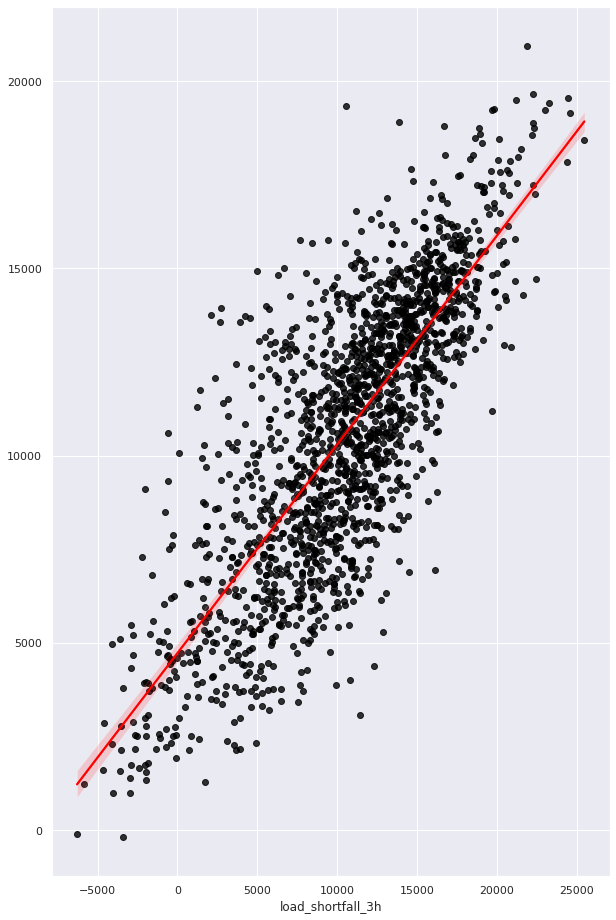

In [69]:
sns.regplot(y_test, preds, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

<a id="seven"></a>
## **7. Model Submission**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In [ ]:
y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.35) 

In [ ]:
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
rfr = RandomForestRegressor()

param_grid = { 
    'n_estimators': [200, 800],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 6)

CV_rfc.fit(x_train, y)
preds = CV_rfc.predict(x_test)

In [ ]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

# <a id="eight"></a>
## **8. Conclusions**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


As a final model we have selected the random forest model. This is a hommogenous ensemble model that votes on prediction from many decision trees. The country of Spain can now use this model to plan for future load shortfall. For example we have seen that the summer and winter months have higher load shortfall.The spring months have lower load shortfall. The spring months can be used for maintenance of the grid in order to prepare for the months with higher demand.Solar power will also be a good option as Solar energy is available throughout the year. We also noticed that higher wind speeds contribute to a lower load shortfall. This means that wind farms are a good option for expanding renewable sources of energy.